In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
 
import warnings
warnings.filterwarnings('ignore')

In [27]:
df_white = pd.read_csv('data/winequality-white.csv',sep = ';',header=0)
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [28]:
df_white['type'] = 1

In [29]:
df_red = pd.read_csv('data/winequality-red.csv',sep = ';',header=0)
print(df_red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [30]:
df_red['type'] = 0

In [31]:
df = pd.concat([df_white,df_red])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Now we’ll explore the descriptive statistical measures of the dataset.

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


### Exploratory Data Analysis

In [37]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

#### Histogram

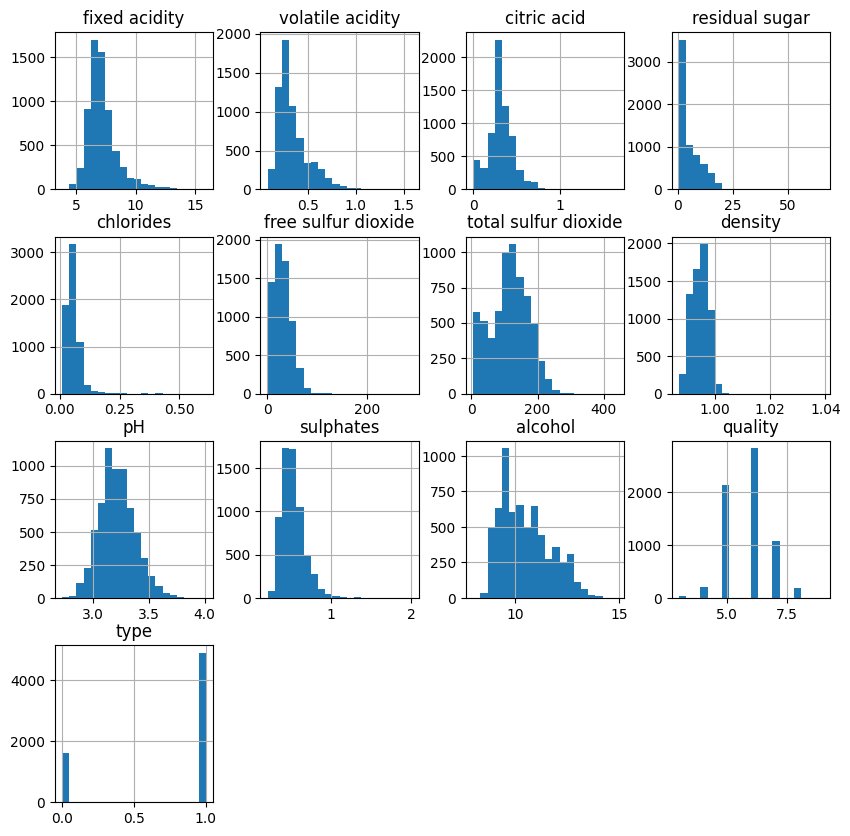

In [38]:
df.hist(bins=20, figsize=(10,10))
plt.show()

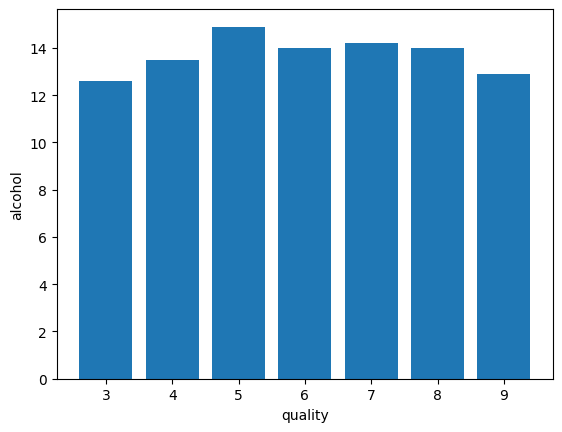

In [39]:
# Now let’s draw the count plot to visualise the number data for each quality of wine
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

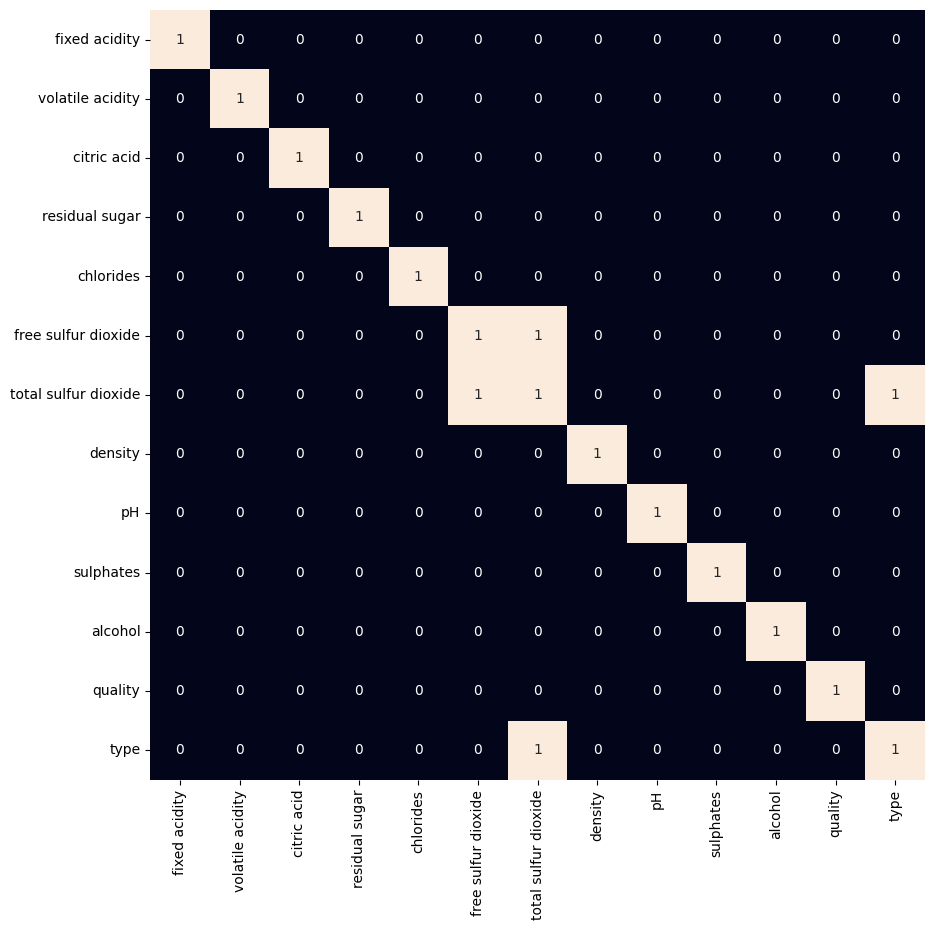

In [40]:
# Check the corelation to remove highly corelated columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.7, annot= True, cbar= False)
plt.show()

From above we can see that free sulfur dioxide and total sulfur dioxide are highly corelated, so we remove one of the columns out of the both

In [41]:
df = df.drop('total sulfur dioxide', axis= 1)

In [42]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


#### Model Development

In [44]:
df['best_quality'] = 0 
for i, x in enumerate(df['quality']):
    if x > 5:
        df['best_quality'][i] = 1
    else:
       df['best_quality'][i] = 0 

In [46]:
# Splitting the data
features = df.drop(['quality', 'best_quality'],axis=1)
target = df['best_quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [47]:
# Normalizing the data
scaling = MinMaxScaler()
xtrain = scaling.fit_transform(xtrain)
xtest = scaling.transform(xtest)

In [48]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'), LinearRegression()]

# Dictionary to hold the test predictions
model_predictions = {}

for model in models:
    model_name = model.__class__.__name__  # Get the name of the model
    model.fit(xtrain, ytrain)
    
    # Get the training and test predictions
    train_predictions = model.predict(xtrain)
    test_predictions = model.predict(xtest)

    # Save the test predictions
    if model_name == 'LinearRegression':
        test_predictions = np.where(test_predictions > 0.5, 1, 0)
        model_predictions[model_name] = test_predictions
    else: 
         model_predictions[model_name] = test_predictions

    print(f'{model_name} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, train_predictions))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, test_predictions))
    print()

LogisticRegression : 
Training Accuracy :  0.5962512603951401
Validation Accuracy :  0.602861511066811

XGBClassifier : 
Training Accuracy :  0.9523213733065781
Validation Accuracy :  0.7251921474571124

SVC : 
Training Accuracy :  0.6309835075424042
Validation Accuracy :  0.6250197922912595

LinearRegression : 
Training Accuracy :  0.7194507672187447
Validation Accuracy :  0.5904579092591583



#### Model Evaluation
From the above accuracies we can say that Logistic Regression and SVC() classifier performing better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix for all models.

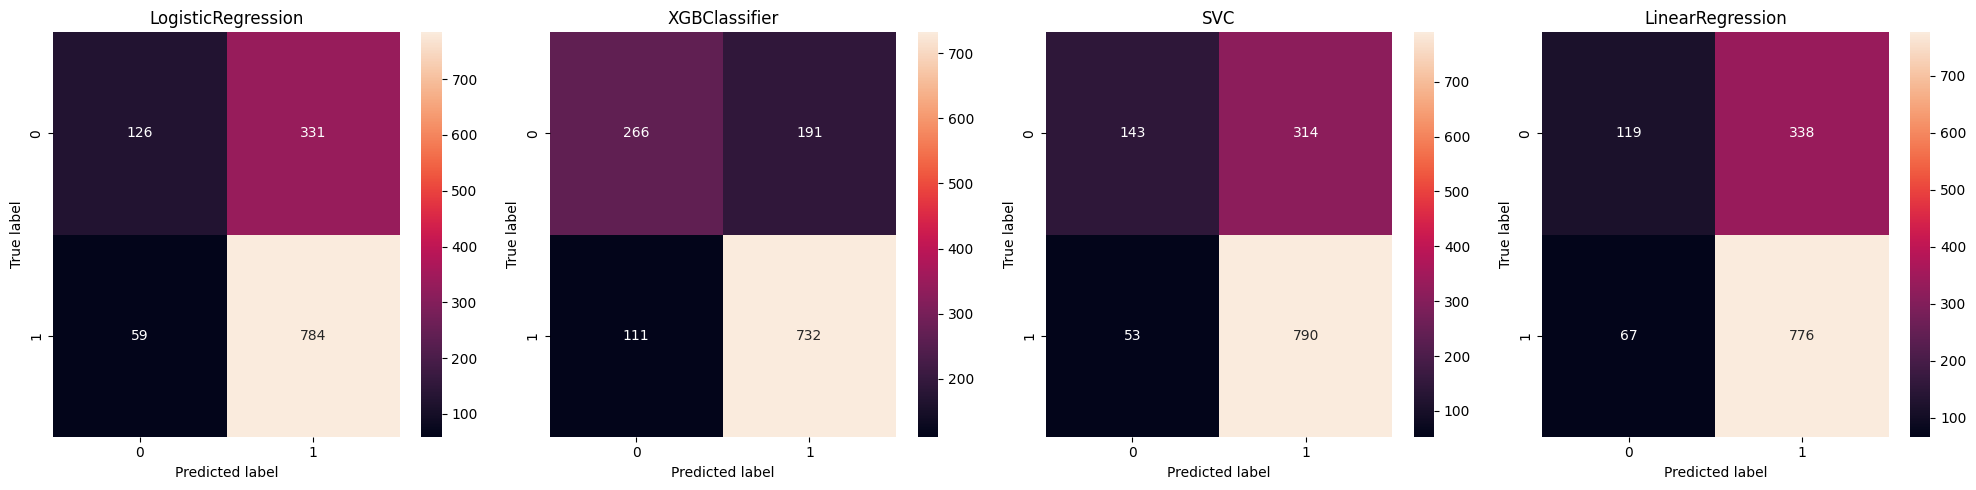

In [51]:
fig, axes = plt.subplots(1, len(models), figsize=(20,5))

for i, (model_name, predictions) in enumerate(model_predictions.items()):
    cm = confusion_matrix(ytest, predictions)

    sns.heatmap(cm, annot= True,  fmt='d',ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted label')
    axes[i].set_ylabel('True label')

# Adjust the layout
plt.tight_layout()
plt.show()

In [58]:
# print the classification report for SVC. 
print(metrics.classification_report(ytest, models[2].predict(xtest)))

              precision    recall  f1-score   support

           0       0.73      0.31      0.44       457
           1       0.72      0.94      0.81       843

    accuracy                           0.72      1300
   macro avg       0.72      0.63      0.62      1300
weighted avg       0.72      0.72      0.68      1300



In [57]:
# print the classification report for Logistic Regressor
print(metrics.classification_report(ytest, models[0].predict(xtest)))

              precision    recall  f1-score   support

           0       0.68      0.28      0.39       457
           1       0.70      0.93      0.80       843

    accuracy                           0.70      1300
   macro avg       0.69      0.60      0.60      1300
weighted avg       0.70      0.70      0.66      1300

